In [1]:
!pip install keras --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.9 MB/s eta 0:00:00


In [3]:
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "tensorflow"  #Se puede poner "jax" or "tensorflow"

# Note that Keras should only be imported after the backend
# has been configured. The backend cannot be changed once the
# package is imported.
import keras

#  Un MLP sencillo para MNIST
Inicialización: librerías y semilla para la generación de números aleatorios

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import keras
keras.utils.set_random_seed(23)

**Lectura de MNIST**


In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f'Lectura: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')
input_dim = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(-1, input_dim).astype("float32")
x_test = x_test.reshape(-1, input_dim).astype("float32")
print(f'Reformato 1: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')
x_train_max = np.max(x_train)
x_train /= x_train_max
x_test /= x_train_max
print(f'Normalización [0,1]: max = {x_train_max}')
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f'Reformato 2: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Lectura: train (60000, 28, 28) (60000,) test (10000, 28, 28) (10000,)
Reformato 1: train (60000, 784) (60000,) test (10000, 784) (10000,)
Normalización [0,1]: max = 255.0
Reformato 2: train (60000, 784) (60000, 10) test (10000, 784) (10000, 10)


**Las Redes neuronales en cada capa hay 2 fases, la preactivación (capa oculta) y la activación, primero se rectifica los datos de entrada (RELU) y despues en la salida se ejecuta la distribución Softmax con D y's probabilidades [0,1] hacia la siguiente capa de la red (capa salida)**

In [6]:
M = keras.Sequential([keras.Input(shape=(input_dim,)),
 keras.layers.Dense(800, activation='relu'),
 keras.layers.Dense(num_classes, activation='softmax')])
M.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
print(f'Número de parámetros de la capa oculta: {784*800 + 800}') #Entrada
print(f'Número de parámetros de la capa de salida: {800*10 + 10}') #Salida

Número de parámetros de la capa oculta: 628000
Número de parámetros de la capa de salida: 8010


In [8]:
M.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
H = M.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1)

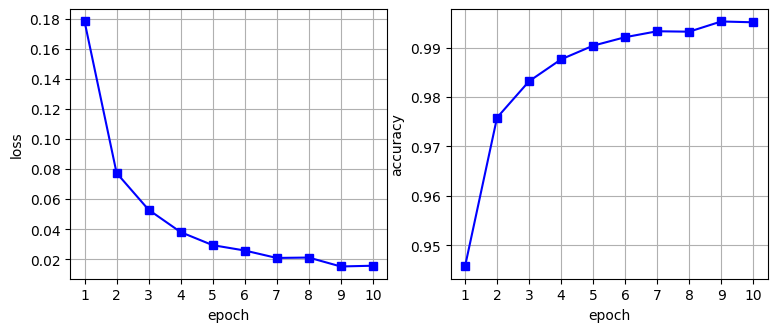

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss')
ax.set_xticks(xx); ax.plot(xx, H.history['loss'], color='b', marker='s')
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xx); ax.plot(xx, H.history['accuracy'], color='b', marker='s');

**Conforme mayor sea la epoch (epoca), menor perdida resulta y por ende es mas preciso la salida de la capa.**

In [11]:
score = M.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

Loss: 0.1065
Precisión: 98.1%


# Ejercicio con FASHION-MNIST

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import keras
keras.utils.set_random_seed(23)

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f'Lectura: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')
input_dim = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(-1, input_dim).astype("float32")
x_test = x_test.reshape(-1, input_dim).astype("float32")
print(f'Reformato 1: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')
x_train_max = np.max(x_train)
x_train /= x_train_max
x_test /= x_train_max
print(f'Normalización [0,1]: max = {x_train_max}')
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f'Reformato 2: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Lectura: train (60000, 28, 28) (60000,) test (10000, 28, 28) (10000,)
Reformato 1: train (60000, 784) (60000,) test (10000, 784) (10000,)
Normalización [0,1]: max = 255.0
Reformato 2: train (60000, 784) (60000, 10) test (10000, 784) (10000, 10)


In [14]:
H = M.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1)

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7803 - loss: 0.9300
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8684 - loss: 0.3650
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8783 - loss: 0.3240
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8925 - loss: 0.2948
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8961 - loss: 0.2817
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9005 - loss: 0.2674
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9044 - loss: 0.2579
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9095 - loss: 0.2456
Epoch 9/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9098 - loss: 0.2372
Epoch 10/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9161 - loss: 0.2269


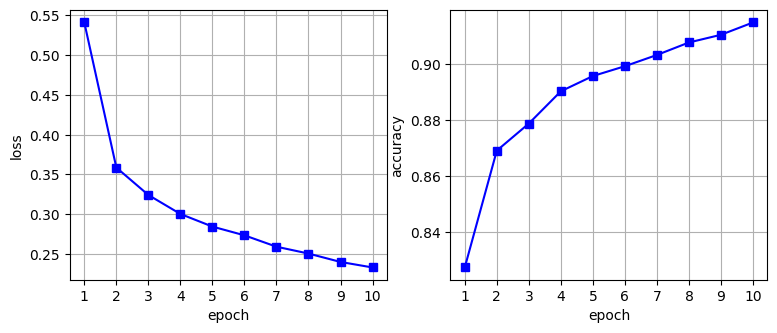

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss')
ax.set_xticks(xx); ax.plot(xx, H.history['loss'], color='b', marker='s')
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xx); ax.plot(xx, H.history['accuracy'], color='b', marker='s');